# Phần I: phương trình y = ax + b

In [1]:
# Giả sử y = 2x + 3
a = 2
b = 3

# Khởi tạo dãy các giá trị x
x = [1,2,3,4,5,6,7,8,9,10]

# Tính các giá trị của y tương ứng từng giá trị x
y = [a*xi + b for xi in x]

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


## Hàm vẽ đơn giản: plt.plot()

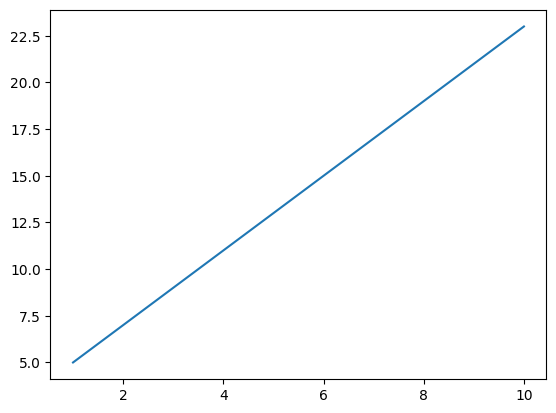

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

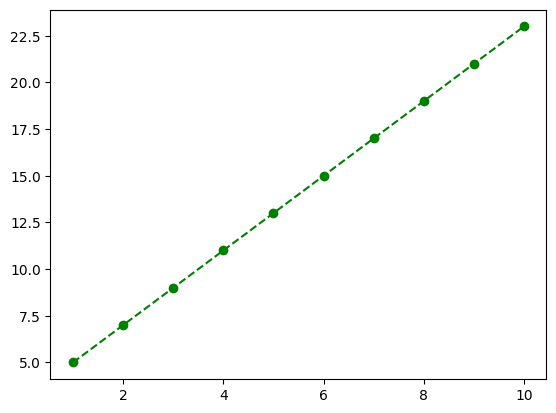

In [3]:
# Thêm một số trang trí cho đẹp hơn
plt.plot(x,y, marker='o', color="green", linestyle="dashed")
plt.show()

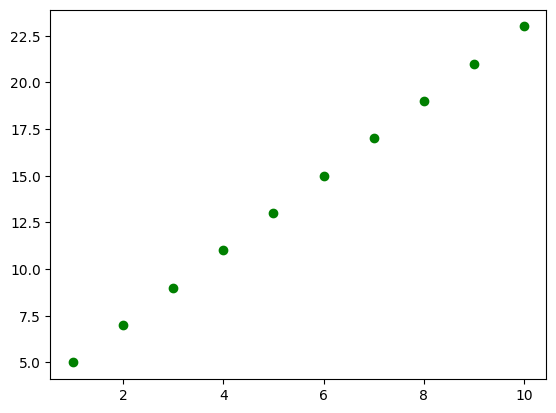

In [4]:
# Vẽ các điểm dữ liệu, không cần vẽ đường
plt.scatter(x,y, color="green")
plt.show()

## Ứng dụng của y=ax + b?
- Đây là phương trình tuyến tính rất đơn giản, từ học sinh cấp 2 đã biết rõ. Nhưng bạn có biết, đây chính là phương trình cơ sở của phương pháp Linear Regression (Hồi Quy Tuyến Tính) ứng dụng rất rộng rãi trong Kinh tế (VD: Dự đoán giá của một sản phẩm, như giá nhà, doanh thu bán hàng...).
- Đặc biệt hơn, đây chính là phương trình cơ sở của một neural (nơ-ron) trong Mạng neural nhân tạo, chính là thứ cơ bản nhất giúp mạng neural hoạt động, tạo ra sự phát triển rực rỡ của AI và Deep Learning ngày nay. Hiện nay phương trình hay dùng nhất trong Deep Learning là y = RELU(ax + b), với RELU là hàm kích hoạt (activation) nhưng chỉ đơn giản là gán y = 0 nếu ax + b < 0, ngược lại thì cứ gán theo đúng phương trình y = ax+b.

# Phần II: Demo Linear Regression đơn giản

## 1. Mô tả vấn đề 
Ví dụ 1 quán cafe quan sát thấy nếu lượng khách đông thì doanh thu tăng lên.

Giả sử doanh thu được tạo ra bởi hàm y = 5x - 10 (Doanh thu = 5*số-khách - 10) và cộng/trừ một lượng không chắc chắn nào đó (còn tùy vào giá tiền món được gọi, và khách có lấy tiền thừa hay ko)

Trên thực tế ta không biết hàm y = 5x - 10 này, mà chỉ quan sát được dữ liệu và cố gắng tìm ra hàm đó để dự đoán dữ liệu khác.

Hồi quy tuyến tính giúp tìm ra một hàm gần giống với hàm đó và có thể dùng để dự đoán được, gọi là hàm xấp xỉ.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
N = 200
a = 5
b = -10
# tien = 5*so_luong_khach - 10
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)

tien = np.random.normal(0,40, [N//5])
doanh_thu = tien + a*so_luong_khach + b

print(doanh_thu)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]
[ 250.49   273.366  327.52   225.903  330.873  455.506  353.324  415.414
  430.8    478.542  436.471  462.502  558.397  558.507  580.183  688.109
  635.88   746.558  730.799  702.97   787.146  763.271  858.483  888.884
  810.764  887.011  861.282  952.936  959.161  921.405 1035.    1031.388
 1021.899 1079.669 1019.609 1144.712 1148.173 1122.755 1075.391 1234.614]


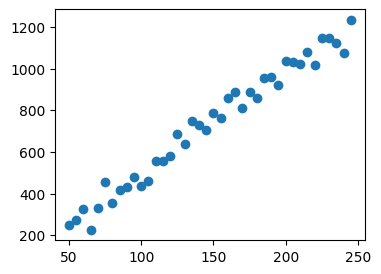

In [6]:
fig, ax = plt.subplots(figsize=(4,3), num=1)
ax.scatter(so_luong_khach, doanh_thu)
plt.show()

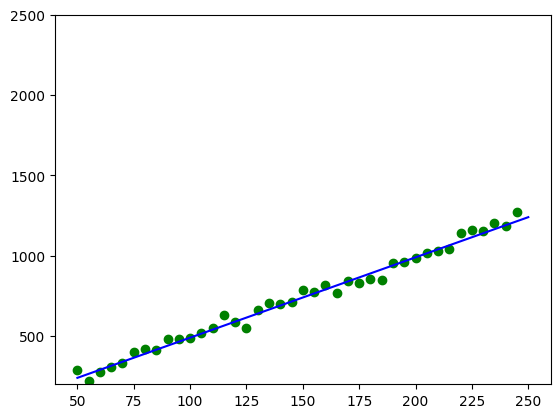

In [19]:
import numpy as np
from matplotlib import pyplot as plt
N = 200
a = 5
b = -10

### Phần này sinh ra dữ liệu (giả định và có tính ngẫu nhiên)
so_luong_khach = np.arange(50,50+N,5) # Số khách: 50, 55, 60, 65, ..., 250.
tien = np.random.normal(0,40, [N//5]) # Lượng tiền cộng/trừ không chắc chắn (ngẫu nhiên, gọi là bias)

# Doanh thu sinh ra tùy theo số khách và lượng tiền cộng/trừ không chắc chắn
doanh_thu = np.round([a*so_luong_khach[i] + b + tien[i] for i in range(N//5)], 2)

# Hàm vẽ phương trình y = ax + b
def Ve_phuong_trinh(heso_a, heso_b, mau='red'):
    x1,x2 = 50, 250
    plt.ylim([200, 2500])
    y1 = heso_a*x1 + heso_b
    y2 = heso_a*x2 + heso_b
    plt.plot([x1,x2],[y1,y2], color=mau)
    
plt.scatter(so_luong_khach, doanh_thu, color="green")

Ve_phuong_trinh(a,b, mau="blue")
plt.show()

## 2. Cách thực hiện Linear Regression
Ở hình trên, các chấm màu green là dữ liệu thực, đường màu xanh blue là hàm y=5x-10.

Ở đây, ta chỉ có thể dựa vào dữ liệu (các chấm màu green) để đi tìm hàm nào phù hợp với dữ liệu đó.

Vì ta không biết a và b, nên khởi tạo "đại" một số nào đó, ví dụ a=10, b=10.

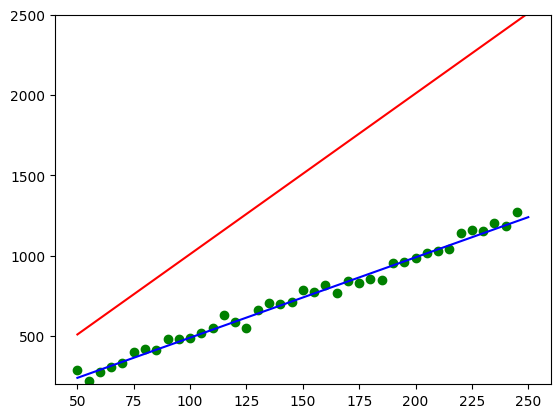

In [20]:
# Khởi tạo và kiểm tra mô hình
khoi_tao_A = 10.
khoi_tao_B = 9.
plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau="blue")
Ve_phuong_trinh(khoi_tao_A, khoi_tao_A, mau="red")
plt.show()

Ở hình trên, đường khởi tạo (màu đỏ) có khoảng cách khá xa so với dữ liệu.

Tiếp theo, ta sẽ tính gradient để cập nhật giá trị của a,b. Lặp đi lặp lại quá trình này nhiều lần sẽ giúp thay đổi giá trị của a và b theo hướng càng ngày càng gần với dữ liệu.

Để tính gradient, ở đây sử dụng 1 hàm tính lỗi của mô hình, gọi là Root Mean Squared Error (rmse)

In [22]:
# Hàm tính lỗi RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2))

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=10):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        #error = rmse(y_du_doan, y)
        error = y_du_doan - y
        if i%2 == 0: print(np.abs(error).mean())
        
        # Tính gradient
        gradient_a = (x * error).mean()
        gradient_b = error.mean()
        #print(gradient_a)
        #print(gradient_b)
        #break
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

750.1469999999999
421.8845849425599
237.67183224795176
134.29618809580126
76.6641248238968
Gia tri cua a va b sau khi hoc: 5.210921185172389 8.971633032020105


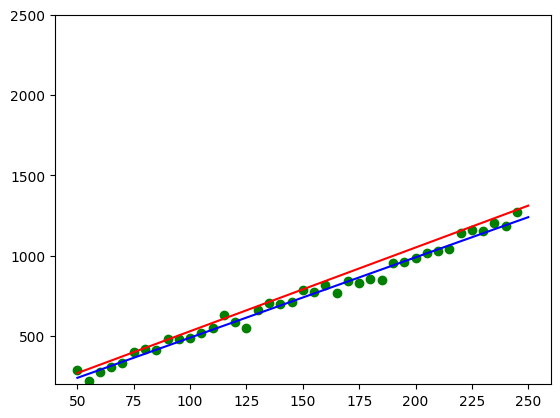

In [23]:
plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(new_a, new_b, mau="red")
plt.show()

Sau khi được huấn luyện (10 lần), đường màu đỏ đã tiến sát vào dữ liệu.

Dưới đây sẽ thử thực hiện huấn luyện lại với 40 lần. Kết quả là đường màu đỏ gần sát vào đường màu xanh blue, nghĩa là khả năng xấp xỉ của a và b tìm được là rất tốt.

750.1469999999999
421.8845849425599
237.67183224795176
134.29618809580126
76.6641248238968
45.91798168319906
33.18047842733084
28.78029713349225
26.758355782819642
25.99644385866287
25.633753752178723
25.548735249361812
25.50424867965855
25.479283320475908
25.465272781929986
25.457409817842567
25.45299672052925
25.450519603144834
25.449128909826378
25.448347890830803
Gia tri cua a va b sau khi hoc: 4.928736917485682 8.96934454905848


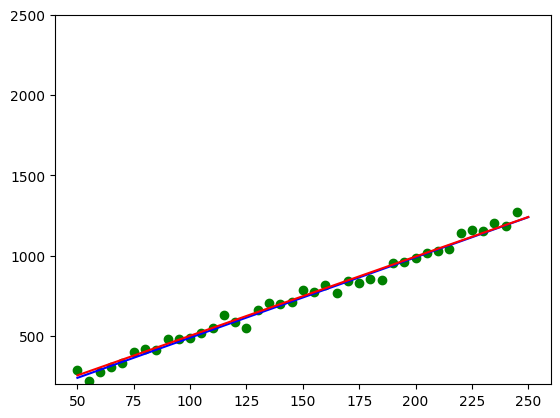

In [26]:
new_a, new_b = linear_regression(so_luong_khach, doanh_thu, 
                                 he_so_huan_luyen=0.00001, 
                                 so_lan_hoc=40)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(new_a, new_b, mau="red")
plt.show()

In [27]:
# Dự đoán doanh thu khi khách lên 300 (chưa bao giờ đạt tới trước đây nên không có trong dữ liệu)
so_khach_du_kien = 300
doanh_thu_du_kien = so_khach_du_kien*new_a + new_b
print(doanh_thu_du_kien)

1487.590419794763


## Lưu ý:
- Trên thực tế, tới đây ta vẫn không biết hàm y=5x - 10.
- Các giá trị he_so_huan_luyen=0.00001, so_lan_hoc=40 chỉ có tác dụng trong demo này. Có thể không hoạt động tốt nếu thay đổi thông số.

In [28]:
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)
print(doanh_thu)
# y = ax + b: a = 5, b = -10

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]
[ 288.15  219.07  278.66  308.06  329.58  401.7   418.31  415.67  480.49
  478.7   488.83  521.1   550.59  628.92  585.    549.15  660.06  708.22
  701.07  709.14  784.92  775.7   816.22  765.67  841.04  833.07  857.11
  849.24  953.23  962.23  984.12 1019.32 1030.83 1039.99 1140.71 1162.87
 1155.36 1206.21 1182.18 1273.63]


## 3. Sử dụng hàm `np.polyfit`

In [29]:
hs_a, hs_b = np.polyfit(so_luong_khach, doanh_thu, deg=1)
print(hs_a, hs_b)

5.0215804878048775 -6.8301219512194296


In [30]:
hs_a*300 + hs_b

1499.6440243902439

**Sử dụng hàm `np.poly1d` để tạo regression model**

In [32]:
my_model = np.poly1d((hs_a, hs_b))

In [33]:
my_model(300)

1499.6440243902439

## 4. Sử dụng hàm `stats.linregress`

In [35]:
from scipy import stats
kq = stats.linregress(so_luong_khach, doanh_thu)

In [36]:
hs_a = kq[0]
hs_b = kq[1]
print(hs_a, hs_b)

5.021580487804879 -6.830121951219667
